In [37]:
import pandas

In [38]:
limma = pandas.read_csv("Limma_results_V3.csv").set_index("gene_name")
limma.shape

(15239, 25)

In [39]:
annot = pandas.read_csv("Nvec_annotations.tsv",sep="\t").set_index("NV2_ID")
annot.head()

,Species,Ortholog_id,Ortholog_desc,GO_info
NV2_ID,,,,
NV2t000007001.1,BRAFL,fgenesh2_pg.scaffold_10000243,jgi|Brafl1|66489|fgenesh2_pg.scaffold_10000243,"GO:0005794(Golgi apparatus),GO:0016020(n/a),GO..."
NV2t000007001.1,CHICK,ENSGALG00000009815.6,transmembrane protein 5 [Source:NCBI gene;Acc:...,"GO:0005654(nucleoplasm),GO:0005794(Golgi appar..."
NV2t000007001.1,CIOIN,ENSCING00000007415,Uncharacterized protein [Source:UniProtKB/TrEM...,"GO:0005794(Golgi apparatus),GO:0016020(n/a),GO..."
NV2t000007001.1,DANRE,ENSDARG00000063414.4,transcript_id=ENSDART00000092648.4,"GO:0000139(Golgi membrane),GO:0005794(Golgi ap..."
NV2t000007001.1,HUMAN,ENSG00000118600.12,ribitol xylosyltransferase 1 [Source:HGNC Symb...,"GO:0000139(Golgi membrane),GO:0005515(n/a),GO:..."


In [40]:
desc={}
for id, row in annot.iterrows():
    if not desc.get(id,False):
        desc[id] = set()
    od = row.Ortholog_desc
    if type(od) == str and "[" in od:
        description = od.split("[")[0]
        description = description.replace(",","").strip()
        if not 'Uncharacterized protein' in od:
            desc.get(id).add(description)

desc

{'NV2t000007001.1': {'ribitol xylosyltransferase 1',
  'transmembrane protein 5'},
 'NV2t000008002.1': {'mediator complex subunit 8'},
 'NV2t000008004.1': {'mediator complex subunit 8'},
 'NV2t000009001.1': {'UTP23 small subunit processome component'},
 'NV2t000010001.1': {'signal sequence receptor delta',
  'signal sequence receptor subunit 4'},
 'NV2t000011001.1': {'peptidase M20 domain containing 1',
  'peptidase M20 domain containing 1 tandem duplicate 1'},
 'NV2t000011002.1': {'peptidase M20 domain containing 1'},
 'NV2t000011003.1': set(),
 'NV2t000012001.1': {'GRIP1 associated protein 1'},
 'NV2t000013001.1': set(),
 'NV2t000015001.1': {'solute carrier family 38 member 9'},
 'NV2t000016001.1': {'Yip1 domain family member 1'},
 'NV2t000017001.1': {'phenylalanyl-tRNA synthetase alpha subunit',
  'phenylalanyl-tRNA synthetase subunit alpha'},
 'NV2t000017002.1': {'phenylalanyl-tRNA synthetase alpha subunit',
  'phenylalanyl-tRNA synthetase subunit alpha'},
 'NV2t000018001.1': {'rin

In [41]:
pandas.Series(desc)

NV2t000007001.1    {transmembrane protein 5, ribitol xylosyltrans...
NV2t000008002.1                         {mediator complex subunit 8}
NV2t000008004.1                         {mediator complex subunit 8}
NV2t000009001.1           {UTP23 small subunit processome component}
NV2t000010001.1    {signal sequence receptor delta, signal sequen...
                                         ...                        
NV2t013288001.1                                                   {}
NV2t013292001.1                 {sphingosine-1-phosphate receptor 1}
NV2t013293002.1                                                   {}
NV2t013294001.1                 {CTD nuclear envelope phosphatase 1}
NV2t013295001.1                    {peroxisomal biogenesis factor 2}
Length: 8715, dtype: object

In [42]:
x= [i.split("|")[0] for i in  limma.index]
len(x)
limma["single_isoform"] = x

In [43]:
limma=limma.set_index("single_isoform")

In [44]:
limma

,protein_id,description,found.in.files,found.in.file_newDB_220921_merged_results_20220921_1643_proteins.txt,found.in.conditions,found.in.reps,max.qupm,average.top3,logFC,AveExpr,...,qval.fdrtool,lfdr.fdrtool,comparison,hit_annotation_method,pvalue,fdr,hit,hit_annotation,subset_annotation,top3
single_isoform,,,,,,,,,,,,,,,,,,,,,
NV2t008285001.1,NV2t008285001.1,NV2t008285001.1,1,1,3,3,6,6.66845,6.139394,28.096744,...,0.000139,0.000235,Larvae - Adult,limma,6.862691e-09,0.000022,True,hit,background,6.66845
NV2t017597001.1,NV2t017597001.1,NV2t017597001.1,1,1,3,3,3,5.98376,4.290754,25.667572,...,0.000187,0.003081,Larvae - Adult,limma,8.829637e-09,0.000022,True,hit,background,5.98376
NV2t010141001.1,NV2t010141001.1,NV2t010141001.1,1,1,3,3,2,6.33017,5.150037,25.106787,...,0.001152,0.062071,Larvae - Adult,limma,1.657187e-08,0.000028,True,hit,hit,6.33017
NV2t014621001.1,NV2t014621001.1|NV2t014621002.1|NV2t014621003.1,NV2t014621001.1|NV2t014621002.1|NV2t014621003.1,1,1,3,3,2,5.91920,3.045675,24.560627,...,0.021148,0.062071,Larvae - Adult,limma,5.300238e-08,0.000061,True,hit,background,5.91920
NV2t014540001.1,NV2t014540001.1|NV2t014540002.1,NV2t014540001.1|NV2t014540002.1,1,1,3,3,6,8.60163,-3.064363,27.675971,...,0.025520,0.288943,Larvae - Adult,limma,5.999402e-08,0.000061,True,hit,background,8.60163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NV2t010272001.1,NV2t010272001.1,NV2t010272001.1,1,1,3,3,3,6.30583,0.001273,23.406830,...,0.942815,1.000000,(Larvae - Adult) - (PrimaryPolyp - Adult),limma,9.971490e-01,0.997935,False,no hit,background,6.30583
NV2t000042001.1,NV2t000042001.1,NV2t000042001.1,1,1,3,3,8,6.49520,0.000889,26.591623,...,0.942819,1.000000,(Larvae - Adult) - (PrimaryPolyp - Adult),limma,9.973736e-01,0.997963,False,no hit,background,6.49520
NV2t007525001.1,NV2t007525001.1,NV2t007525001.1,1,1,3,3,11,7.70546,0.000508,27.616385,...,0.942832,1.000000,(Larvae - Adult) - (PrimaryPolyp - Adult),limma,9.980075e-01,0.998401,False,no hit,background,7.70546


In [45]:

limma["orthologue_description"] = [desc.get(idx) for idx in limma.index]
limma

,protein_id,description,found.in.files,found.in.file_newDB_220921_merged_results_20220921_1643_proteins.txt,found.in.conditions,found.in.reps,max.qupm,average.top3,logFC,AveExpr,...,lfdr.fdrtool,comparison,hit_annotation_method,pvalue,fdr,hit,hit_annotation,subset_annotation,top3,orthologue_description
single_isoform,,,,,,,,,,,,,,,,,,,,,
NV2t008285001.1,NV2t008285001.1,NV2t008285001.1,1,1,3,3,6,6.66845,6.139394,28.096744,...,0.000235,Larvae - Adult,limma,6.862691e-09,0.000022,True,hit,background,6.66845,{}
NV2t017597001.1,NV2t017597001.1,NV2t017597001.1,1,1,3,3,3,5.98376,4.290754,25.667572,...,0.003081,Larvae - Adult,limma,8.829637e-09,0.000022,True,hit,background,5.98376,None
NV2t010141001.1,NV2t010141001.1,NV2t010141001.1,1,1,3,3,2,6.33017,5.150037,25.106787,...,0.062071,Larvae - Adult,limma,1.657187e-08,0.000028,True,hit,hit,6.33017,{}
NV2t014621001.1,NV2t014621001.1|NV2t014621002.1|NV2t014621003.1,NV2t014621001.1|NV2t014621002.1|NV2t014621003.1,1,1,3,3,2,5.91920,3.045675,24.560627,...,0.062071,Larvae - Adult,limma,5.300238e-08,0.000061,True,hit,background,5.91920,None
NV2t014540001.1,NV2t014540001.1|NV2t014540002.1,NV2t014540001.1|NV2t014540002.1,1,1,3,3,6,8.60163,-3.064363,27.675971,...,0.288943,Larvae - Adult,limma,5.999402e-08,0.000061,True,hit,background,8.60163,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NV2t010272001.1,NV2t010272001.1,NV2t010272001.1,1,1,3,3,3,6.30583,0.001273,23.406830,...,1.000000,(Larvae - Adult) - (PrimaryPolyp - Adult),limma,9.971490e-01,0.997935,False,no hit,background,6.30583,{}
NV2t000042001.1,NV2t000042001.1,NV2t000042001.1,1,1,3,3,8,6.49520,0.000889,26.591623,...,1.000000,(Larvae - Adult) - (PrimaryPolyp - Adult),limma,9.973736e-01,0.997963,False,no hit,background,6.49520,"{beta-carotene oxygenase 1, Gallus gallus beta..."
NV2t007525001.1,NV2t007525001.1,NV2t007525001.1,1,1,3,3,11,7.70546,0.000508,27.616385,...,1.000000,(Larvae - Adult) - (PrimaryPolyp - Adult),limma,9.980075e-01,0.998401,False,no hit,background,7.70546,{growth factor receptor bound protein 2}


In [46]:
limma.to_excel("ECM-Dev-Proteome-Annot/annotated_dataset.xlsx")

In [47]:
ecms= limma.loc[limma.subset_annotation != "background"]

In [85]:
ecms.to_excel("ECM-Dev-Proteome-Annot/annotated_ecm_dataset.xlsx")

In [49]:
ids=ecms.protein_id.unique()

In [50]:
all_ids= set()
for id in ids:
    if "|" in id:
        breakdown=id.split("|")
        for id in breakdown:
            all_ids.add(id)
    else:
        all_ids.add(id)
len(all_ids)

243

In [51]:
from Bio import SeqIO
from Bio.Alphabet import generic_protein

In [52]:
seqs= SeqIO.parse("ECM-Dev-Proteome-Annot/Nematostella_vectensis_proteome.fasta","fasta")

In [53]:
dev_prot_seqs=[]
for seq in seqs:
    if seq.id in all_ids:
        seq.description = str(desc.get(seq.id))
        seq.seq.alphabet=generic_protein
        dev_prot_seqs.append(seq)
        all_ids.remove(seq.id)
print(len(dev_prot_seqs))
SeqIO.write(dev_prot_seqs,"ECM-Dev-Proteome-Annot/experimental_ECM.gb","gb")

243


243

In [54]:
all_ids

set()

In [67]:
ecm_subset= pandas.read_csv("ECM-Dev-Proteome-Annot/ecm_subset.csv",header=None,names=["ids"])
in_silico_ecm_ids = list(ecm_subset.ids)
len(in_silico_ecm_ids)

1777

In [68]:
orthogroups = pandas.read_csv("D:/Data/programs/mesoglea_protein_pipeline/output/all_in_silico/OrthoFinder/Results_Oct20/Orthogroups/orthogroups.tsv",sep= "\t",index_col=0)
orthogroups.head()

,Choanoflagellatea_Monosiga_brevicollis,Choanoflagellatea_Salpingoeca_rosetta,Chordata_Vertebrata_Homo_sapiens,Chordata_Vertebrata_Mus_musculus,Cnidaria_Anthozoa_Exaiptasia_diaphana,Cnidaria_Anthozoa_Nematostella_vectensis,Cnidaria_Anthozoa_Renilla_reniformis,Cnidaria_Cubozoa_Morbakka_virulenta,Cnidaria_Hydrozoa_Clytia_hemispherica,Cnidaria_Hydrozoa_Hydra_vulgaris,Cnidaria_Scyphozoa_Aurelia_aurita,Cnidaria_Scyphozoa_Cassiopea_xamachana,Cnidaria_Staurozoa_Calvadosia_cruxmelitensis,Ctenophora_Mnemiopsis_leidyi,Nematoda_Caenorhabditis_elegans,Placozoa_Tricoplax_adhaerens,Porifera_Amphimedon_queenslandica
Orthogroup,,,,,,,,,,,,,,,,,
OG0000000,Monosiga_brevicollisXP_001742800.1 XP_00174280...,Salpingoeca_rosetta_XP_004989262.1 XP_00498926...,Homo_sapiens_sp|A2VEC9|SSPO_HUMAN sp|A2VEC9|SS...,Mus_musculus_sp|A2AJ76|HMCN2_MOUSE sp|A2AJ76|H...,Exaiptasia_diaphana_XP_020892077.1 XP_02089207...,Nematostella_vectensis_NV2t000360001.1 NV2t000...,"Renilla_reniformis_g1836.t1 g1836.t1, Renilla_...",Morbakka_virulenta_scaffold1.g61.t1 scaffold1....,Clytia_hemispherica_TCONS_00001402-protein TCO...,Hydra_vulgaris_Sc4wPfr_106.g23502.t1 Sc4wPfr_1...,Aurelia_aurita_Seg10356.1 Seg10356.1 transcrip...,Cassiopea_xamachana_Cxam_g12088.t1 Cxam_g12088...,Calvadosia_cruxmelitensis_Ccrux.Trinity.11443 ...,"Mnemiopsis_leidyi_ML000132a ML000132a, Mnemiop...","Caenorhabditis_elegans_C02B4.1b C02B4.1b, Caen...",Tricoplax_adhaerens_tr|B3RLH2|B3RLH2_TRIAD tr|...,Amphimedon_queenslandica_tr|A0A1X7SFE6|A0A1X7S...
OG0000001,Monosiga_brevicollisXP_001742046.1 XP_00174204...,Salpingoeca_rosetta_XP_004988175.1 XP_00498817...,Homo_sapiens_sp|A4D0S4|LAMB4_HUMAN sp|A4D0S4|L...,Mus_musculus_sp|O09118|NET1_MOUSE sp|O09118|NE...,Exaiptasia_diaphana_XP_020893198.1 XP_02089319...,Nematostella_vectensis_NV2t000570001.1 NV2t000...,"Renilla_reniformis_g10536.t1 g10536.t1, Renill...",Morbakka_virulenta_scaffold1.g52.t1 scaffold1....,Clytia_hemispherica_TCONS_00002459-protein TCO...,Hydra_vulgaris_Sc4wPfr_1127.g22555.t1 Sc4wPfr_...,Aurelia_aurita_Seg1093.3 Seg1093.3 transcript_...,Cassiopea_xamachana_Cxam_g10258.t1 Cxam_g10258...,Calvadosia_cruxmelitensis_Ccrux.Trinity.10578 ...,"Mnemiopsis_leidyi_ML035910a ML035910a, Mnemiop...","Caenorhabditis_elegans_C54D1.5 C54D1.5, Caenor...",Tricoplax_adhaerens_tr|B3RI08|B3RI08_TRIAD tr|...,Amphimedon_queenslandica_tr|A0A1X7SF06|A0A1X7S...
OG0000002,Monosiga_brevicollisXP_001744475.1 XP_00174447...,NaN,Homo_sapiens_sp|O00602|FCN1_HUMAN sp|O00602|FC...,Mus_musculus_sp|E9PV24|FIBA_MOUSE sp|E9PV24|FI...,Exaiptasia_diaphana_XP_020892023.1 XP_02089202...,Nematostella_vectensis_NV2t003941001.1 NV2t003...,"Renilla_reniformis_g11481.t1 g11481.t1, Renill...",Morbakka_virulenta_scaffold16.g2.t1 scaffold16...,Clytia_hemispherica_TCONS_00001342-protein TCO...,Hydra_vulgaris_Sc4wPfr_570.g25944.t1 Sc4wPfr_5...,Aurelia_aurita_Seg1014.2 Seg1014.2 transcript_...,Cassiopea_xamachana_Cxam_g10370.t1 Cxam_g10370...,Calvadosia_cruxmelitensis_Ccrux.Trinity.10161 ...,NaN,"Caenorhabditis_elegans_C49C8.5 C49C8.5, Caenor...",NaN,Amphimedon_queenslandica_tr|A0A1X7SDN8|A0A1X7S...
OG0000003,Monosiga_brevicollisXP_001743737.1 XP_00174373...,Salpingoeca_rosetta_XP_004987814.1 XP_00498781...,Homo_sapiens_sp|A6NMZ7|CO6A6_HUMAN sp|A6NMZ7|C...,Mus_musculus_sp|A2AX52|CO6A4_MOUSE sp|A2AX52|C...,Exaiptasia_diaphana_XP_020893409.2 XP_02089340...,Nematostella_vectensis_NV2t000836001.1 NV2t000...,"Renilla_reniformis_g10123.t1 g10123.t1, Renill...",Morbakka_virulenta_scaffold1.g57.t1 scaffold1....,Clytia_hemispherica_TCONS_00000463-protein TCO...,Hydra_vulgaris_Sc4wPfr_1150.g32027.t1 Sc4wPfr_...,Aurelia_aurita_Seg1267.6 Seg1267.6 transcript_...,Cassiopea_xamachana_Cxam_g16233.t1 Cxam_g16233...,Calvadosia_cruxmelitensis_Ccrux.Trinity.16828 ...,"Mnemiopsis_leidyi_ML00359a ML00359a, Mnemiopsi...","Caenorhabditis_elegans_C16E9.1 C16E9.1, Caenor...",Tricoplax_adhaerens_tr|B3S0H4|B3S0H4_TRIAD tr|...,Amphimedon_queenslandica_tr|A0A1X7SFH7|A0A1X7S...
OG0000004,Monosiga_brevicollisXP_001747

In [69]:
nv_og= orthogroups.Cnidaria_Anthozoa_Nematostella_vectensis.dropna()
nv_og

Orthogroup
OG0000000    Nematostella_vectensis_NV2t000360001.1 NV2t000...
OG0000001    Nematostella_vectensis_NV2t000570001.1 NV2t000...
OG0000002    Nematostella_vectensis_NV2t003941001.1 NV2t003...
OG0000003    Nematostella_vectensis_NV2t000836001.1 NV2t000...
OG0000004    Nematostella_vectensis_NV2t003028001.1 NV2t003...
                                   ...                        
OG0000962    Nematostella_vectensis_NV2t020530001.1 NV2t020...
OG0000963    Nematostella_vectensis_NV2t021792001.1 NV2t021...
OG0000964    Nematostella_vectensis_NV2t022384001.1 NV2t022...
OG0000965    Nematostella_vectensis_NV2t023293001.1 NV2t023...
OG0000966    Nematostella_vectensis_NV2t023604002.1 NV2t023...
Name: Cnidaria_Anthozoa_Nematostella_vectensis, Length: 332, dtype: object

In [76]:
i=0
in_silico_ogs = set()
for id in in_silico_ecm_ids:
    row = nv_og.loc[nv_og.str.contains(id)]
    if len(row)>0:
        i += 1
        in_silico_ogs.add(row.index[0])
        print(i,id,"\t",row.index[0])
print(len(in_silico_ogs))

1 NV2t000638001.1 	 OG0000071
2 NV2t000844001.1 	 OG0000003
3 NV2t007757001.1 	 OG0000407
4 NV2t018541001.1 	 OG0000000
5 NV2t015330001.1 	 OG0000657
6 NV2t015186001.1 	 OG0000657
7 NV2t008633001.1 	 OG0000003
8 NV2t004034001.1 	 OG0000419
9 NV2t013457001.1 	 OG0000127
10 NV2t014905001.1 	 OG0000000
11 NV2t014919005.1 	 OG0000000
12 NV2t014919003.1 	 OG0000000
13 NV2t016336001.1 	 OG0000030
14 NV2t022022001.1 	 OG0000175
15 NV2t009302001.1 	 OG0000014
16 NV2t005873001.1 	 OG0000002
17 NV2t014919001.1 	 OG0000000
18 NV2t020657001.1 	 OG0000313
19 NV2t021994002.1 	 OG0000136
20 NV2t021994005.1 	 OG0000136
21 NV2t021994001.1 	 OG0000136
22 NV2t006810001.1 	 OG0000001
23 NV2t000737001.1 	 OG0000000
24 NV2t003538002.1 	 OG0000672
25 NV2t021158014.1 	 OG0000050
26 NV2t003736003.1 	 OG0000007
27 NV2t023293001.1 	 OG0000965
28 NV2t000914002.1 	 OG0000099
29 NV2t018043001.1 	 OG0000162
30 NV2t023295002.1 	 OG0000026
31 NV2t009849001.1 	 OG0000035
32 NV2t014189001.1 	 OG0000314
33 NV2t022114001.

In [74]:
ecm_ids = set(ecms.index)
len(ecm_ids)

243

In [77]:
i=0
ecm_ogs = set()
for id in ecm_ids:
    row = nv_og.loc[nv_og.str.contains(id)]
    if len(row)>0:
        i += 1
        ecm_ogs.add(row.index[0])
        print(i,id,"\t",row.index[0])
print(len(ecm_ogs))

1 NV2t011346003.1 	 OG0000003
2 NV2t009760001.1 	 OG0000003
3 NV2t017495003.1 	 OG0000087
4 NV2t021273001.1 	 OG0000641
5 NV2t013183001.1 	 OG0000058
6 NV2t012441001.1 	 OG0000161
7 NV2t008769001.1 	 OG0000047
8 NV2t022930001.1 	 OG0000075
9 NV2t016213001.1 	 OG0000269
10 NV2t006495001.1 	 OG0000951
11 NV2t002146001.1 	 OG0000000
12 NV2t009243001.1 	 OG0000031
13 NV2t000244001.1 	 OG0000019
14 NV2t016479001.1 	 OG0000003
15 NV2t023710001.1 	 OG0000003
16 NV2t008558001.1 	 OG0000666
17 NV2t020449001.1 	 OG0000024
18 NV2t014088001.1 	 OG0000309
19 NV2t010745001.1 	 OG0000210
20 NV2t007835003.1 	 OG0000131
21 NV2t013225001.1 	 OG0000006
22 NV2t020167001.1 	 OG0000060
23 NV2t005224001.1 	 OG0000007
24 NV2t016600001.1 	 OG0000224
25 NV2t003169001.1 	 OG0000007
26 NV2t022463001.1 	 OG0000060
27 NV2t022932001.1 	 OG0000075
28 NV2t000914001.1 	 OG0000099
29 NV2t002228001.1 	 OG0000003
30 NV2t008768001.1 	 OG0000633
31 NV2t023271001.1 	 OG0000182
32 NV2t008618001.1 	 OG0000003
33 NV2t013872001.

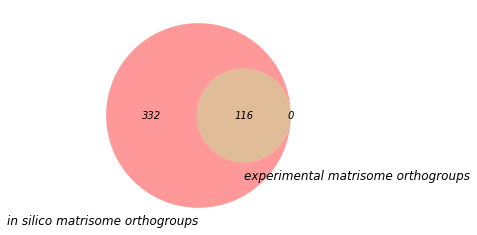

In [87]:
intersect = in_silico_ogs.intersection(ecm_ogs)

venn2(subsets = (len(in_silico_ogs), len(ecm_ogs)-len(intersect), len(intersect)), set_labels = ('in silico matrisome orthogroups', 'experimental matrisome orthogroups'))

plt.savefig("ECM-Dev-Proteome-Annot/in_silco_vs_exp.pdf")
plt.savefig("ECM-Dev-Proteome-Annot/in_silco_vs_exp.svg")
plt.savefig("ECM-Dev-Proteome-Annot/in_silco_vs_exp.png")
plt.show()

In [59]:
dev_prot_seqs=[]
for seq in seqs:
    if seq.id in list(ecm_subset.ids):
        seq.description = str(desc.get(seq.id))
        seq.seq.alphabet=generic_protein
        dev_prot_seqs.append(seq)
print(len(dev_prot_seqs))
SeqIO.write(dev_prot_seqs,"ECM-Dev-Proteome-Annot/in_situ_ECM.gb","gb")

0


0

In [60]:
import pylab as plt
from matplotlib_venn import venn2

In [61]:
all_ids= set()
for id in limma.protein_id:
    if "|" in id:
        breakdown=id.split("|")
        for id in breakdown:
            all_ids.add(id)
    else:
        all_ids.add(id)
len(all_ids)

6918

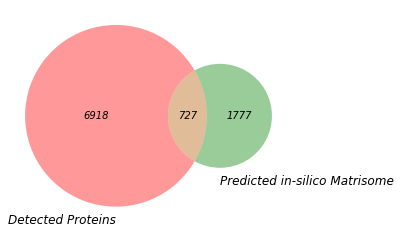

In [89]:
venn2(subsets = (6918, len(in_silico_ecm_ids), len(ecms)), set_labels = ('Detected Proteins', 'Predicted in-silico Matrisome'))

plt.savefig("ECM-Dev-Proteome-Annot/VennDiagram.pdf")
plt.savefig("ECM-Dev-Proteome-Annot/VennDiagram.svg")
plt.savefig("ECM-Dev-Proteome-Annot/VennDiagram.png")
plt.show()